In [1]:
import os
import glob

from jinja2 import Environment, FileSystemLoader
from IPython.core.display import HTML

from indra_cogex.analysis.source_targets_explanation import explain_downstream

source_protein_name = 'CTNNB1'

target_protein_names = ['VWA2', 'LRP4', 'CTNNB1', 'GLCE', 'ACSL5', 'NOTUM', 'APCDD1',
                        'DKK4', 'EPHA7', 'CTNNA2', 'ADAMTSL2', 'CALML3', 'CEMIP2', 'AMOT',
                        'CXCL14', 'PLA2G4A', 'RCN2', 'TTC9', 'FABP4', 'GPCPD1', 'VSNL1',
                        'CRYBB1', 'LEF1', 'PDZD8', 'FNDC3A']

output_folder = 'analysis_test'

INFO: [2024-10-01 16:30:39] indra_cogex.analysis.source_targets_explanation - Dataframe of protiens that have INDRA relationships with HGNC:2514 that have been filtered:
        name target_type target_id       stmt_type  evidence_count  \
2490    LEF1        HGNC      6551         Complex               1   
2491    LEF1        HGNC      6551         Complex               1   
2492    LEF1        HGNC      6551  IncreaseAmount               1   
2493    LEF1        HGNC      6551         Complex               1   
2494    LEF1        HGNC      6551         Complex               1   
...      ...         ...       ...             ...             ...   
5519    GLCE        HGNC     17855  IncreaseAmount               2   
5546    AMOT        HGNC     17810         Complex               1   
5547    AMOT        HGNC     17810         Complex               1   
6246  APCDD1        HGNC     15718         Complex               5   
6370  CALML3        HGNC      1452      Activation          

         curie             name             p       mlp         q       mlq
38  go:0005515  protein binding  8.559999e-07  6.067526  0.003941  2.404391


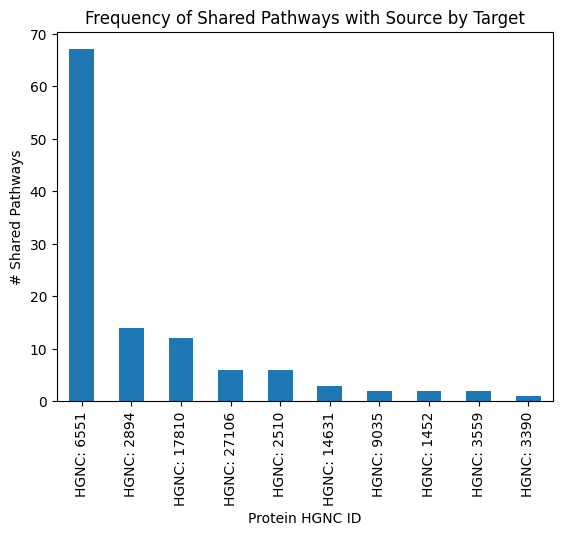

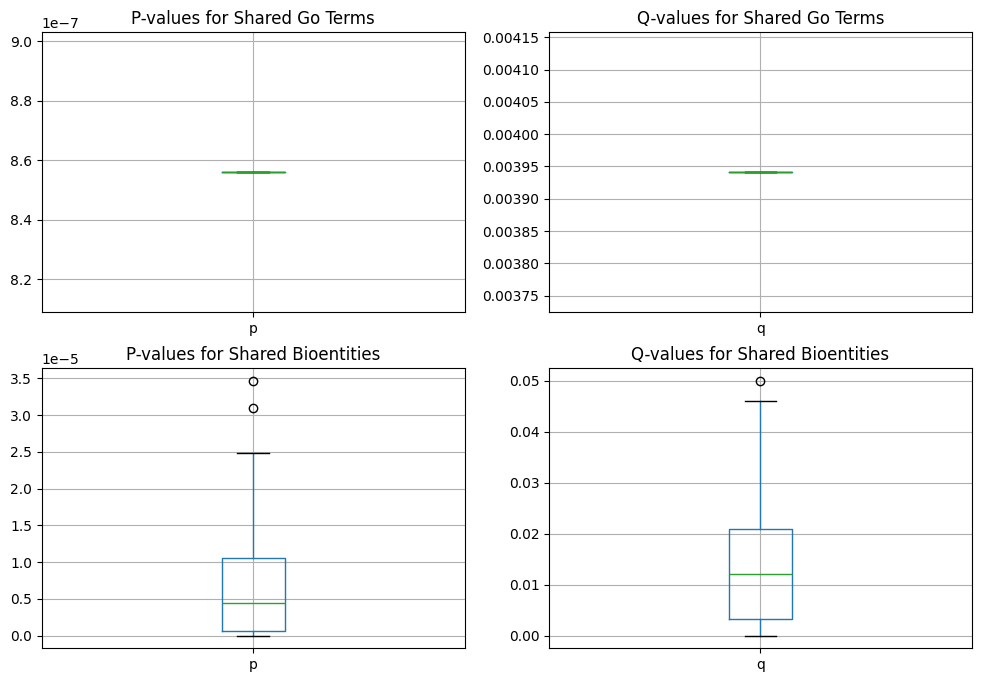

In [2]:
results = explain_downstream(source_protein_name, target_protein_names, output_folder)

env = Environment(loader=FileSystemLoader('.')) 
template = env.get_template('protein_analysis_template.html')
output = template.render(result=results)

with open('results.html', 'w') as f:
    f.write(output)

In [3]:
htmls = glob.glob(os.path.join(output_folder, '*.html'))
for html in htmls:
    HTML(html)

In [4]:
HTML(html)

In [5]:
from indra.sources import indra_db_rest

In [6]:
ip = indra_db_rest.get_statements(subject='LEF1')

INFO: [2024-10-01 16:31:09] indra_db_rest.query_processor - Retrieving statements that have an agent where NAME=LEF1 with role=SUBJECT.
INFO: [2024-10-01 16:31:09] indra_db_rest.request_logs - Running 0th request for statements
INFO: [2024-10-01 16:31:09] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-10-01 16:31:09] indra_db_rest.request_logs -   OFFSET: 0
INFO: [2024-10-01 16:31:15] indra_db_rest.request_logs - Running 1st request for statements
INFO: [2024-10-01 16:31:15] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-10-01 16:31:15] indra_db_rest.request_logs -   OFFSET: 500
INFO: [2024-10-01 16:31:17] indra_db_rest.request_logs - Running 2nd request for statements
INFO: [2024-10-01 16:31:17] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-10-01 16:31:17] indra_db_rest.request_logs -   OFFSET: 1000
INFO: [2024-10-01 16:31:19] indra_db_rest.request_logs - Running 3rd request for statements
INFO: [2024-10-01 16:31:19] indra_db_rest.request_logs -   LIMIT: None


In [7]:
from indra.tools import assemble_corpus as ac
stmts = ac.filter_gene_list(ip.statements, set(target_protein_names) - {'CTNNB1'} | {'LEF1'}, policy='all')

INFO: [2024-10-01 16:31:30] indra.tools.assemble_corpus - Filtering 5026 statements for ones containing "all" of: VSNL1, NOTUM, APCDD1, CRYBB1, EPHA7, FNDC3A, ACSL5, FABP4, CEMIP2, RCN2, ADAMTSL2, CXCL14, PDZD8, PLA2G4A, GLCE, GPCPD1, CTNNA2, LEF1, DKK4, TTC9, CALML3, LRP4, AMOT, VWA2...
INFO: [2024-10-01 16:31:30] indra.tools.assemble_corpus - 25 statements after filter...


In [8]:
stmts

[Activation(LEF1(), LEF1()),
 DecreaseAmount(LEF1(), LEF1()),
 Inhibition(LEF1(), LEF1()),
 IncreaseAmount(LEF1(), LEF1()),
 IncreaseAmount(LEF1(), LEF1()),
 IncreaseAmount(LEF1(mods: (modification)), LEF1()),
 DecreaseAmount(LEF1(), ACSL5()),
 DecreaseAmount(LEF1(), VWA2()),
 Complex(LEF1(), LEF1()),
 Inhibition(LEF1(), LEF1()),
 DecreaseAmount(LEF1(), PLA2G4A()),
 DecreaseAmount(LEF1(), CTNNA2()),
 DecreaseAmount(LEF1(), LEF1()),
 DecreaseAmount(LEF1(), VSNL1()),
 DecreaseAmount(LEF1(), FABP4()),
 DecreaseAmount(LEF1(), LEF1(muts: (K, 86, E))),
 DecreaseAmount(LEF1(mods: (modification)), LEF1()),
 Phosphorylation(LEF1(), LEF1(mods: (phosphorylation))),
 Activation(LEF1(), LEF1(muts: (None, None, None))),
 DecreaseAmount(LEF1(), RCN2()),
 DecreaseAmount(LEF1(), CEMIP2()),
 Activation(LEF1(), LEF1()),
 IncreaseAmount(LEF1(), LEF1(muts: (K, 86, E))),
 DecreaseAmount(LEF1(), EPHA7()),
 IncreaseAmount(LEF1(), DKK4())]

In [9]:
stmts = [s for s in stmts if len({x.name for x in s.real_agent_list()}) > 1]

In [10]:
stmts

[DecreaseAmount(LEF1(), ACSL5()),
 DecreaseAmount(LEF1(), VWA2()),
 DecreaseAmount(LEF1(), PLA2G4A()),
 DecreaseAmount(LEF1(), CTNNA2()),
 DecreaseAmount(LEF1(), VSNL1()),
 DecreaseAmount(LEF1(), FABP4()),
 DecreaseAmount(LEF1(), RCN2()),
 DecreaseAmount(LEF1(), CEMIP2()),
 DecreaseAmount(LEF1(), EPHA7()),
 IncreaseAmount(LEF1(), DKK4())]

In [11]:
from indra.assemblers.html import HtmlAssembler

In [12]:
ha = HtmlAssembler(stmts)

In [13]:
_ = ha.make_model(grouping_level='statement')
ha.save_model('LEF1_explanations.html')

In [14]:
ip = indra_db_rest.get_statements(subject='TCF7L2')

INFO: [2024-10-01 16:31:30] indra_db_rest.query_processor - Retrieving statements that have an agent where NAME=TCF7L2 with role=SUBJECT.
INFO: [2024-10-01 16:31:30] indra_db_rest.request_logs - Running 0th request for statements
INFO: [2024-10-01 16:31:30] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-10-01 16:31:30] indra_db_rest.request_logs -   OFFSET: 0
INFO: [2024-10-01 16:31:33] indra_db_rest.request_logs - Running 1st request for statements
INFO: [2024-10-01 16:31:33] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-10-01 16:31:33] indra_db_rest.request_logs -   OFFSET: 500
INFO: [2024-10-01 16:31:34] indra_db_rest.request_logs - Running 2nd request for statements
INFO: [2024-10-01 16:31:34] indra_db_rest.request_logs -   LIMIT: None
INFO: [2024-10-01 16:31:34] indra_db_rest.request_logs -   OFFSET: 1000


In [15]:
stmts = ac.filter_gene_list(ip.statements, set(target_protein_names) - {'CTNNB1'} | {'TCF7L2'}, policy='all')
stmts = [s for s in stmts if len({x.name for x in s.real_agent_list()}) > 1]

INFO: [2024-10-01 16:31:35] indra.tools.assemble_corpus - Filtering 1170 statements for ones containing "all" of: VSNL1, NOTUM, APCDD1, CRYBB1, EPHA7, FNDC3A, ACSL5, FABP4, CEMIP2, RCN2, ADAMTSL2, CXCL14, PDZD8, PLA2G4A, GLCE, GPCPD1, CTNNA2, LEF1, DKK4, TCF7L2, TTC9, CALML3, LRP4, AMOT, VWA2...
INFO: [2024-10-01 16:31:35] indra.tools.assemble_corpus - 11 statements after filter...


In [16]:
ha = HtmlAssembler(stmts)
_ = ha.make_model(grouping_level='statement')
ha.save_model('TCF7L2_explanations.html')